## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

# Data from an API Key source:

### Obtain Data

The following three datasets contain the median household listing price for all homes in the states of Utah, Colorado, and Idaho. This data can be used to show the cost of living difference between the three states. It can also be combined with corporate data to determine if they have higher sales in a state with a higher cost of living or if there is some other relationship.

In [1]:
import quandl
Utahhd= quandl.get('ZILLOW/S44_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Idahohd= quandl.get('ZILLOW/S15_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Coloradohd= quandl.get('ZILLOW/S7_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')

In [2]:
Utahhd.describe()

,Value
count,55.000000
mean,279548.090909
std,33489.947139
min,230000.000000
25%,249900.000000
50%,285000.000000
75%,299900.000000
max,337500.000000


In [3]:
Idahohd.describe()

,Value
count,96.000000
mean,192836.937500
std,43425.088843
min,132550.000000
25%,149900.000000
50%,190000.000000
75%,225652.500000
max,277500.000000


In [4]:
Coloradohd.describe()

,Value
count,96.000000
mean,298270.473958
std,66098.253683
min,199900.000000
25%,238357.375000
50%,289900.000000
75%,361250.000000
max,408597.000000


### Clean Data

Note that the data from each state does not contain the same amount of observations with both Idaho and Colorado beginning before Utah's data. To correct for this, I will merge the dataframes and only keep the datapoints that all three states contain.

In [5]:
import pandas as pd
ui= Utahhd.merge(Idahohd, right_index=True, left_index=True)
uic= ui.merge(Coloradohd, right_index=True, left_index=True)
uic.columns = ['Utah','Idaho','Colorado']
uic.head(6)

,Utah,Idaho,Colorado
Date,,,
2013-06-30,230000.0,190000.0,279000.0
2013-07-31,234900.0,194900.0,282000.0
2013-08-31,234900.0,194500.0,284995.0
2013-09-30,235000.0,194990.0,289900.0
2013-10-31,234900.0,190000.0,285000.0
2013-11-30,234900.0,184990.0,285000.0


In [6]:
#Check that counts are correct across each state
uic.describe(percentiles=[.05,.15,.85,.95])

,Utah,Idaho,Colorado
count,55.000000,55.000000,55.000000
mean,279548.090909,223143.081818,347601.800000
std,33489.947139,31319.323235,40167.903429
min,230000.000000,166787.000000,279000.000000
5%,234900.000000,182500.000000,284998.500000
15%,235000.000000,190250.000000,295400.000000
50%,285000.000000,224900.000000,350000.000000
85%,319500.000000,263809.500000,398100.000000
95%,329620.000000,272900.000000,405450.000000
max,337500.000000,277500.000000,408597.000000


In [7]:
uic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2013-06-30 to 2017-12-31
Data columns (total 3 columns):
Utah        55 non-null float64
Idaho       55 non-null float64
Colorado    55 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB


In [8]:
#Check for missing values
uic.columns[uic.isnull().any()]

Index([], dtype='object')

There are no missing values from June 2013 to November 2017

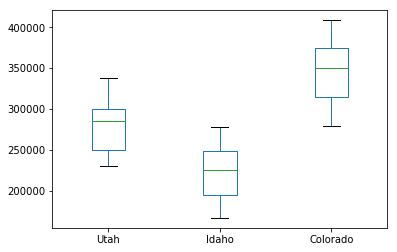

In [9]:
#Look for outliers
import matplotlib.pyplot as plt
%matplotlib inline
uicbox= uic.plot(kind='box')

In [10]:
#Utah Outliers
std_Utah= uic['Utah'].std()
print('Anything beyond {} is an outlier'.format((std_Utah*3)+ uic['Utah'].mean()))
print('The maximum value is {}'.format(uic['Utah'].max()))
print('Anything less than {} is an oulier'.format(uic['Utah'].mean() - (std_Utah*3)))
print('The minimum value is {}'.format(uic['Utah'].min()))

Anything beyond 380017.93232642487 is an outlier
The maximum value is 337500.0
Anything less than 179078.24949175687 is an oulier
The minimum value is 230000.0


In [11]:
#Idaho Outliers
std_Idaho= uic['Idaho'].std()
print('Anything beyond {} is an outlier'.format((std_Idaho*3)+ uic['Idaho'].mean()))
print('The maximum value is {}'.format(uic['Idaho'].max()))
print('Anything less than {} is an oulier'.format(uic['Idaho'].mean() - (std_Idaho*3)))
print('The minimum value is {}'.format(uic['Idaho'].min()))

Anything beyond 317101.05152262095 is an outlier
The maximum value is 277500.0
Anything less than 129185.1121137427 is an oulier
The minimum value is 166787.0


In [12]:
#Colorado Outliers
std_Colorado= uic['Colorado'].std()
maxoutColorado= (std_Colorado*3)+ uic['Colorado'].mean()
minoutColorado= uic['Colorado'].mean() - (std_Colorado*3)
print('Anything beyond {} is an outlier'.format(maxoutColorado))
print('The maximum value is {}'.format(uic['Colorado'].max()))
print('Anything less than {} is an oulier'.format(minoutColorado))
print('The minimum value is {}'.format(uic['Colorado'].min()))

Anything beyond 468105.51028679294 is an outlier
The maximum value is 408597.0
Anything less than 227098.08971320704 is an oulier
The minimum value is 279000.0


There are no outliers in any of the three states

### Visualize

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


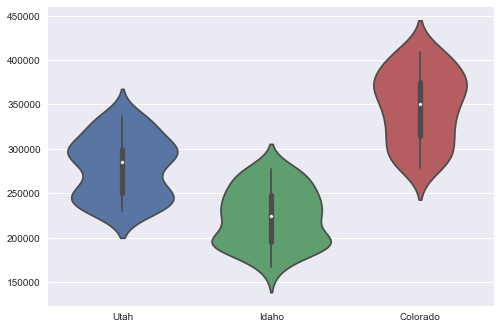

In [13]:
import seaborn as sns
sns.violinplot(uic)
sns.despine(left=True, bottom=True)

From this the tables and this visualization, it is clear that Colorado housing prices are on average greater than those of Idaho or Utah. This would imply a higher cost of living.  

At this point, the data has been clean and examined. Further analysis can be run to see trends or input the data into some equations.

# Data from CSV:

### Obtain Data

The following data comes from a dataset that I collected on all of the school districts in Colorado with information on their students and teachers.

In [14]:
School_data= pd.read_csv("/Users/tristanmoser/Files/Tristan/CondensedMilk2.csv")

### Look at and Clean Data

In [15]:
School_data.describe(percentiles=[.1,.9])

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2014.000000,51103.346442,0.858858,0.822678,40038.071985,0.816966,41.106742,218.814607,288.629213,0.744944,256.011236,0.917210,0.326742,4846.614232
std,0.817262,14271.270922,0.239973,0.162112,6840.826751,0.139297,165.291235,557.783904,736.222808,0.073305,638.164309,0.113089,0.221190,12709.425752
min,2013.000000,22304.000000,0.380000,0.000000,18103.610000,0.370000,2.990000,3.000000,3.000000,0.440000,3.000000,0.140000,0.000000,10.000000
10%,2013.000000,34923.300000,0.583000,0.640000,32938.579000,0.673000,8.181000,12.000000,16.000000,0.650000,15.000000,0.813000,0.110000,121.300000
50%,2014.000000,48750.000000,0.820000,0.850000,38826.440000,0.790000,14.435000,32.000000,43.000000,0.750000,41.000000,0.950000,0.260000,585.500000
90%,2015.000000,69763.100000,1.180000,1.000000,48762.088000,0.990000,21.889000,571.800000,741.600000,0.820000,635.100000,1.000000,0.707000,14266.900000
max,2015.000000,108692.000000,1.850000,1.000000,65999.660000,1.350000,1635.340000,4277.000000,5711.000000,1.000000,4729.000000,1.000000,0.950000,88839.000000


In [16]:
School_data.isnull().any()

District    False
Year        False
MHI         False
MHItS       False
GR          False
MTS         False
MTStS       False
SToTR       False
FemT        False
TotT        False
FtoTR       False
WhiT        False
PctWT       False
PctMS       False
NumS        False
dtype: bool

There do not appear to be any missing datapoints

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


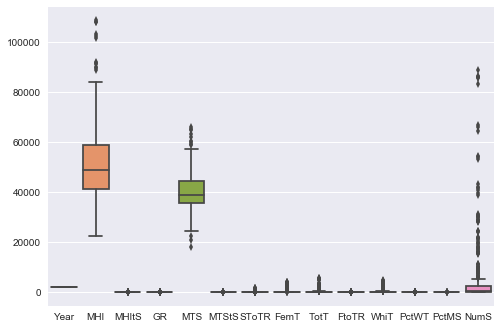

In [17]:
bbbox = sns.boxplot(School_data)

In [18]:
quantile_data= School_data.quantile([.25,.75])
quantile_data.loc['iqr']= quantile_data.loc[.75]-quantile_data.loc[.25]
quantile_data.loc['whisker_length'] = 1.5 * quantile_data.loc['iqr']
quantile_data.loc['max_whisker'] = quantile_data.loc['whisker_length'] + quantile_data.loc[0.75]
quantile_data.loc['max'] = School_data.max()
quantile_data.loc['min_whisker'] = quantile_data.loc[0.25] - quantile_data.loc['whisker_length']
quantile_data.loc['min'] = School_data.min()
quantile_data

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
0.25,2013.0,41161.500,0.69,0.770,35724.29750,0.73,11.0325,16.000,22.0,0.71000,21.000,0.89000,0.16,217.250
0.75,2015.0,58739.250,0.99,0.920,44377.00000,0.91,17.5375,115.250,145.0,0.78750,140.750,0.99750,0.46,2314.500
iqr,2.0,17577.750,0.30,0.150,8652.70250,0.18,6.5050,99.250,123.0,0.07750,119.750,0.10750,0.30,2097.250
whisker_length,3.0,26366.625,0.45,0.225,12979.05375,0.27,9.7575,148.875,184.5,0.11625,179.625,0.16125,0.45,3145.875
max_whisker,2018.0,85105.875,1.44,1.145,57356.05375,1.18,27.2950,264.125,329.5,0.90375,320.375,1.15875,0.91,5460.375
max,2015.0,108692.000,1.85,1.000,65999.66000,1.35,1635.3400,4277.000,5711.0,1.00000,4729.000,1.00000,0.95,88839.000
min_whisker,2010.0,14794.875,0.24,0.545,22745.24375,0.46,1.2750,-132.875,-162.5,0.59375,-158.625,0.72875,-0.29,-2928.625
min,2013.0,22304.000,0.38,0.000,18103.61000,0.37,2.9900,3.000,3.0,0.44000,3.000,0.14000,0.00,10.000


In [19]:
max_outlier_MHI = [MHI for MHI in School_data['MHI'] if MHI > quantile_data['MHI'].loc['max_whisker']]
len(max_outlier_MHI)

12

In [20]:
max_outlier_MHI[:12]

[92196,
 103116,
 89769,
 108692,
 91654,
 102601,
 88689,
 108151,
 89953,
 101475,
 91433,
 107889]

There do appear to be some outliers  
Above Max Whisker:  
 - Median Household Income
 - Mean Teacher Salary
 - Student To Teacher Ratio
 - Female Teachers
 - Total Teachers
 - White Teachers
 - Number of Students
 
Many of these datapoints seem to be things associated with a higher populated area

In [21]:
population_variables = School_data[['MHI','MTS','SToTR','FemT','TotT','WhiT','NumS']]
population_variables.corr()

,MHI,MTS,SToTR,FemT,TotT,WhiT,NumS
MHI,1.000000,0.465520,0.031363,0.324588,0.318543,0.342753,0.331829
MTS,0.465520,1.000000,0.021974,0.529479,0.527590,0.540093,0.533540
SToTR,0.031363,0.021974,1.000000,-0.030514,-0.030742,-0.030451,-0.031770
FemT,0.324588,0.529479,-0.030514,1.000000,0.999759,0.996863,0.997055
TotT,0.318543,0.527590,-0.030742,0.999759,1.000000,0.996357,0.996054
WhiT,0.342753,0.540093,-0.030451,0.996863,0.996357,1.000000,0.996429
NumS,0.331829,0.533540,-0.031770,0.997055,0.996054,0.996429,1.000000


# JSON Data via API and Data from an Excel File

## Obtain JSON data

In [76]:
import json
import requests
nfl = requests.get("https://www.fantasyfootballnerd.com/service/players/json/zgp6wzse67ai/QB/")

In [77]:
nfl_data= json.loads(nfl.text)

In [78]:
nfl_data

{'Players': [{'active': '1',
   'college': '',
   'displayName': 'Brandon Allen',
   'dob': '0000-00-00',
   'fname': 'Brandon',
   'height': '',
   'jersey': '8',
   'lname': 'Allen',
   'playerId': '3274',
   'position': 'QB',
   'team': 'LAR',
   'weight': ''},
  {'active': '1',
   'college': '',
   'displayName': 'Derek Anderson',
   'dob': '0000-00-00',
   'fname': 'Derek',
   'height': '',
   'jersey': '3',
   'lname': 'Anderson',
   'playerId': '2',
   'position': 'QB',
   'team': 'CAR',
   'weight': ''},
  {'active': '1',
   'college': 'Northern Iowa',
   'displayName': 'Aaron Bailey',
   'dob': '0000-00-00',
   'fname': 'Aaron',
   'height': '6-1',
   'jersey': '15',
   'lname': 'Bailey',
   'playerId': '3510',
   'position': 'QB',
   'team': 'BAL',
   'weight': '233'},
  {'active': '1',
   'college': '',
   'displayName': 'Matt Barkley',
   'dob': '0000-00-00',
   'fname': 'Matt',
   'height': '',
   'jersey': '9',
   'lname': 'Barkley',
   'playerId': '2168',
   'position': 

In [79]:
nfl_df = pd.DataFrame(nfl_data['Players'])
nfl_df.head()

,active,college,displayName,dob,fname,height,jersey,lname,playerId,position,team,weight
0,1,,Brandon Allen,0000-00-00,Brandon,,8,Allen,3274,QB,LAR,
1,1,,Derek Anderson,0000-00-00,Derek,,3,Anderson,2,QB,CAR,
2,1,Northern Iowa,Aaron Bailey,0000-00-00,Aaron,6-1,15,Bailey,3510,QB,BAL,233
3,1,,Matt Barkley,0000-00-00,Matt,,9,Barkley,2168,QB,ARI,
4,1,,C.J. Beathard,0000-00-00,C.J.,,3,Beathard,3321,QB,SF,


## Read in Excel Doc

In [80]:
NFL_csv1 = pd.read_excel("/Users/tristanmoser/Files/Coding/HW1/NFL2.xlsx")

In [81]:
NFL_csv1.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,13,84.7
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,8,102.8
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,8,103.9
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,7,81.7
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,13,86.4


In [82]:
full_nfl = NFL_csv1.merge(nfl_df, on= 'lname')
full_nfl.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,...,college,displayName,dob,fname,height,jersey,playerId,position,team,weight
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,...,,Blake Bortles,0000-00-00,Blake,,5,2627,QB,JAC,
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,...,,Tom Brady,0000-00-00,Tom,,12,13,QB,NE,
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,...,,Drew Brees,0000-00-00,Drew,,9,14,QB,NO,
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,...,,Jacoby Brissett,0000-00-00,Jacoby,,7,3030,QB,IND,
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,...,,Derek Carr,0000-00-00,Derek,,4,2503,QB,OAK,


In [83]:
full_nfl = full_nfl.drop(['college','height','weight','displayName','dob','active','position'], axis=1)
full_nfl.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR,fname,jersey,playerId,team
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,13,84.7,Blake,5,2627,JAC
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,8,102.8,Tom,12,13,NE
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,8,103.9,Drew,9,14,NO
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,7,81.7,Jacoby,7,3030,IND
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,13,86.4,Derek,4,2503,OAK


In [86]:
full_nfl.isnull().any()

lname       False
GP          False
COMP        False
ATT         False
PCT         False
ATT/G       False
YDS         False
AVG         False
YDS/G       False
TD          False
INT         False
QBR         False
fname       False
jersey      False
playerId    False
team        False
dtype: bool

In [88]:
full_nfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 16 columns):
lname       32 non-null object
GP          32 non-null int64
COMP        32 non-null int64
ATT         32 non-null int64
PCT         32 non-null float64
ATT/G       32 non-null float64
YDS         32 non-null int64
AVG         32 non-null float64
YDS/G       32 non-null float64
TD          32 non-null int64
INT         32 non-null int64
QBR         32 non-null float64
fname       32 non-null object
jersey      32 non-null object
playerId    32 non-null object
team        32 non-null object
dtypes: float64(5), int64(6), object(5)
memory usage: 4.2+ KB


In [87]:
full_nfl.describe()

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14.531250,300.343750,475.906250,0.629531,32.737500,3409.375000,7.143750,234.221875,20.843750,10.656250,89.078125
std,2.031754,57.276133,80.448886,0.035766,2.765426,734.593579,0.697894,35.119214,7.265071,3.840442,10.814051
min,7.000000,164.000000,267.000000,0.536000,27.500000,1836.000000,5.700000,166.900000,7.000000,4.000000,60.500000
25%,13.750000,266.750000,437.250000,0.606500,30.600000,2926.000000,6.700000,207.225000,17.000000,7.000000,80.775000
50%,15.000000,302.500000,491.000000,0.626000,32.900000,3396.000000,7.300000,232.150000,21.500000,11.000000,90.300000
75%,16.000000,343.250000,537.000000,0.649500,34.300000,4042.000000,7.750000,269.500000,26.250000,13.000000,96.575000
max,16.000000,386.000000,581.000000,0.720000,38.100000,4577.000000,8.100000,286.100000,34.000000,22.000000,104.700000


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


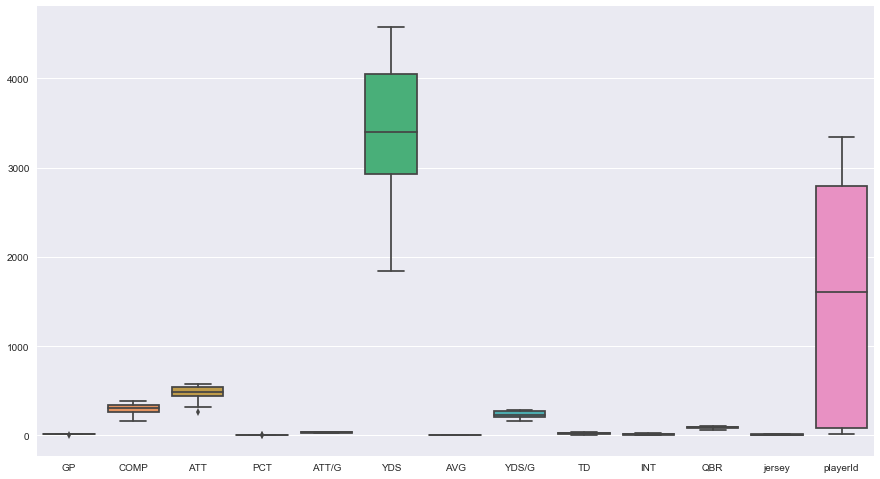

In [95]:
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(full_nfl)

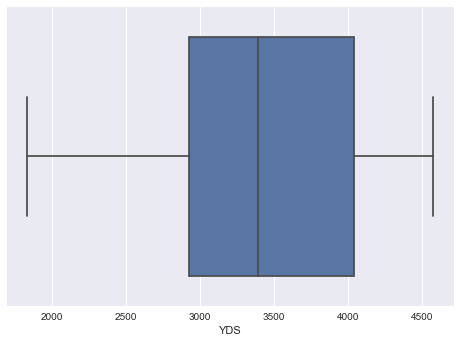

In [96]:
sns.boxplot(full_nfl['YDS'])

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


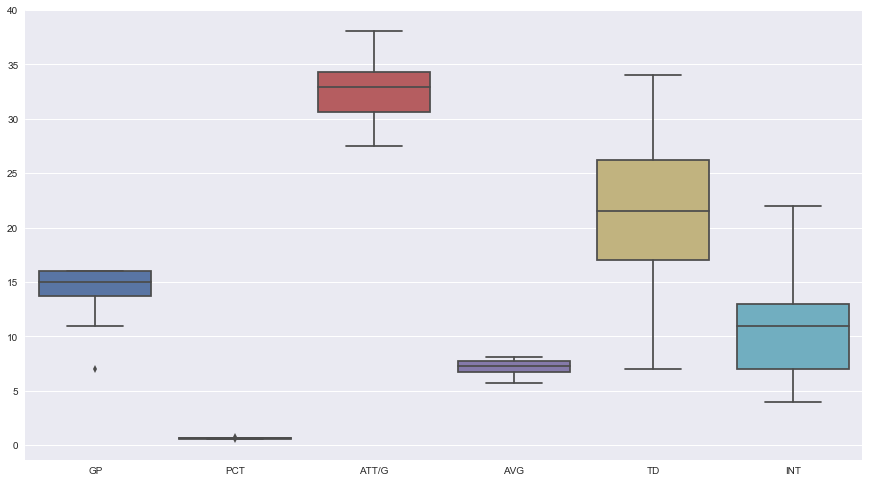

In [102]:
small_stats= full_nfl[['GP','PCT','ATT/G','AVG','TD','INT']]
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(small_stats)

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


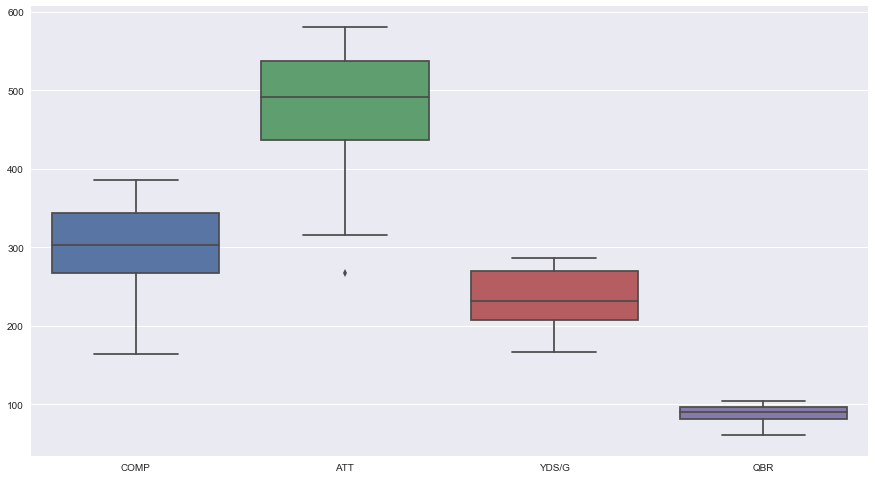

In [103]:
medium_stats= full_nfl[['COMP','ATT','YDS/G','QBR']]
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(medium_stats)

In [104]:
nfl_quantile_data= full_nfl.quantile([.25,.75])
nfl_quantile_data.loc['iqr']= nfl_quantile_data.loc[.75]-nfl_quantile_data.loc[.25]
nfl_quantile_data.loc['whisker_length'] = 1.5 * nfl_quantile_data.loc['iqr']
nfl_quantile_data.loc['max_whisker'] = nfl_quantile_data.loc['whisker_length'] + nfl_quantile_data.loc[0.75]
nfl_quantile_data.loc['max'] = full_nfl.max()
nfl_quantile_data.loc['min_whisker'] = nfl_quantile_data.loc[0.25] - nfl_quantile_data.loc['whisker_length']
nfl_quantile_data.loc['min'] = full_nfl.min()
nfl_quantile_data

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
0.25,13.750,266.75,437.250,0.6065,30.60,2926.0,6.700,207.2250,17.000,7.0,80.775
0.75,16.000,343.25,537.000,0.6495,34.30,4042.0,7.750,269.5000,26.250,13.0,96.575
iqr,2.250,76.50,99.750,0.0430,3.70,1116.0,1.050,62.2750,9.250,6.0,15.800
whisker_length,3.375,114.75,149.625,0.0645,5.55,1674.0,1.575,93.4125,13.875,9.0,23.700
max_whisker,19.375,458.00,686.625,0.7140,39.85,5716.0,9.325,362.9125,40.125,22.0,120.275
max,16.000,386.00,581.000,0.7200,38.10,4577.0,8.100,286.1000,34.000,22.0,104.700
min_whisker,10.375,152.00,287.625,0.5420,25.05,1252.0,5.125,113.8125,3.125,-2.0,57.075
min,7.000,164.00,267.000,0.5360,27.50,1836.0,5.700,166.9000,7.000,4.0,60.500


In [107]:
full_nfl['jersey'].value_counts()

7     6
3     4
5     3
10    2
4     2
11    2
8     2
9     2
17    1
6     1
1     1
14    1
15    1
16    1
12    1
13    1
2     1
Name: jersey, dtype: int64

In [115]:
full_nfl.corr()

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
GP,1.000000,0.818893,0.882095,0.170447,0.029639,0.739143,0.126404,0.085276,0.556521,0.160586,0.277885
COMP,0.818893,1.000000,0.956401,0.539266,0.506598,0.931435,0.429098,0.545855,0.743104,-0.018217,0.588164
ATT,0.882095,0.956401,1.000000,0.272289,0.488465,0.892445,0.276952,0.435004,0.722993,0.160995,0.409759
PCT,0.170447,0.539266,0.272289,1.000000,0.245049,0.494757,0.614837,0.532999,0.375865,-0.517638,0.768097
ATT/G,0.029639,0.506598,0.488465,0.245049,1.000000,0.527551,0.374190,0.788886,0.497394,0.029500,0.364737
YDS,0.739143,0.931435,0.892445,0.494757,0.527551,1.000000,0.674760,0.724263,0.823968,-0.104154,0.704162
AVG,0.126404,0.429098,0.276952,0.614837,0.374190,0.674760,1.000000,0.862890,0.582263,-0.499703,0.853486
YDS/G,0.085276,0.545855,0.435004,0.532999,0.788886,0.724263,0.862890,1.000000,0.648694,-0.312303,0.754997
TD,0.556521,0.743104,0.722993,0.375865,0.497394,0.823968,0.582263,0.648694,1.000000,-0.174255,0.760001
INT,0.160586,-0.018217,0.160995,-0.517638,0.029500,-0.104154,-0.499703,-0.312303,-0.174255,1.000000,-0.675319


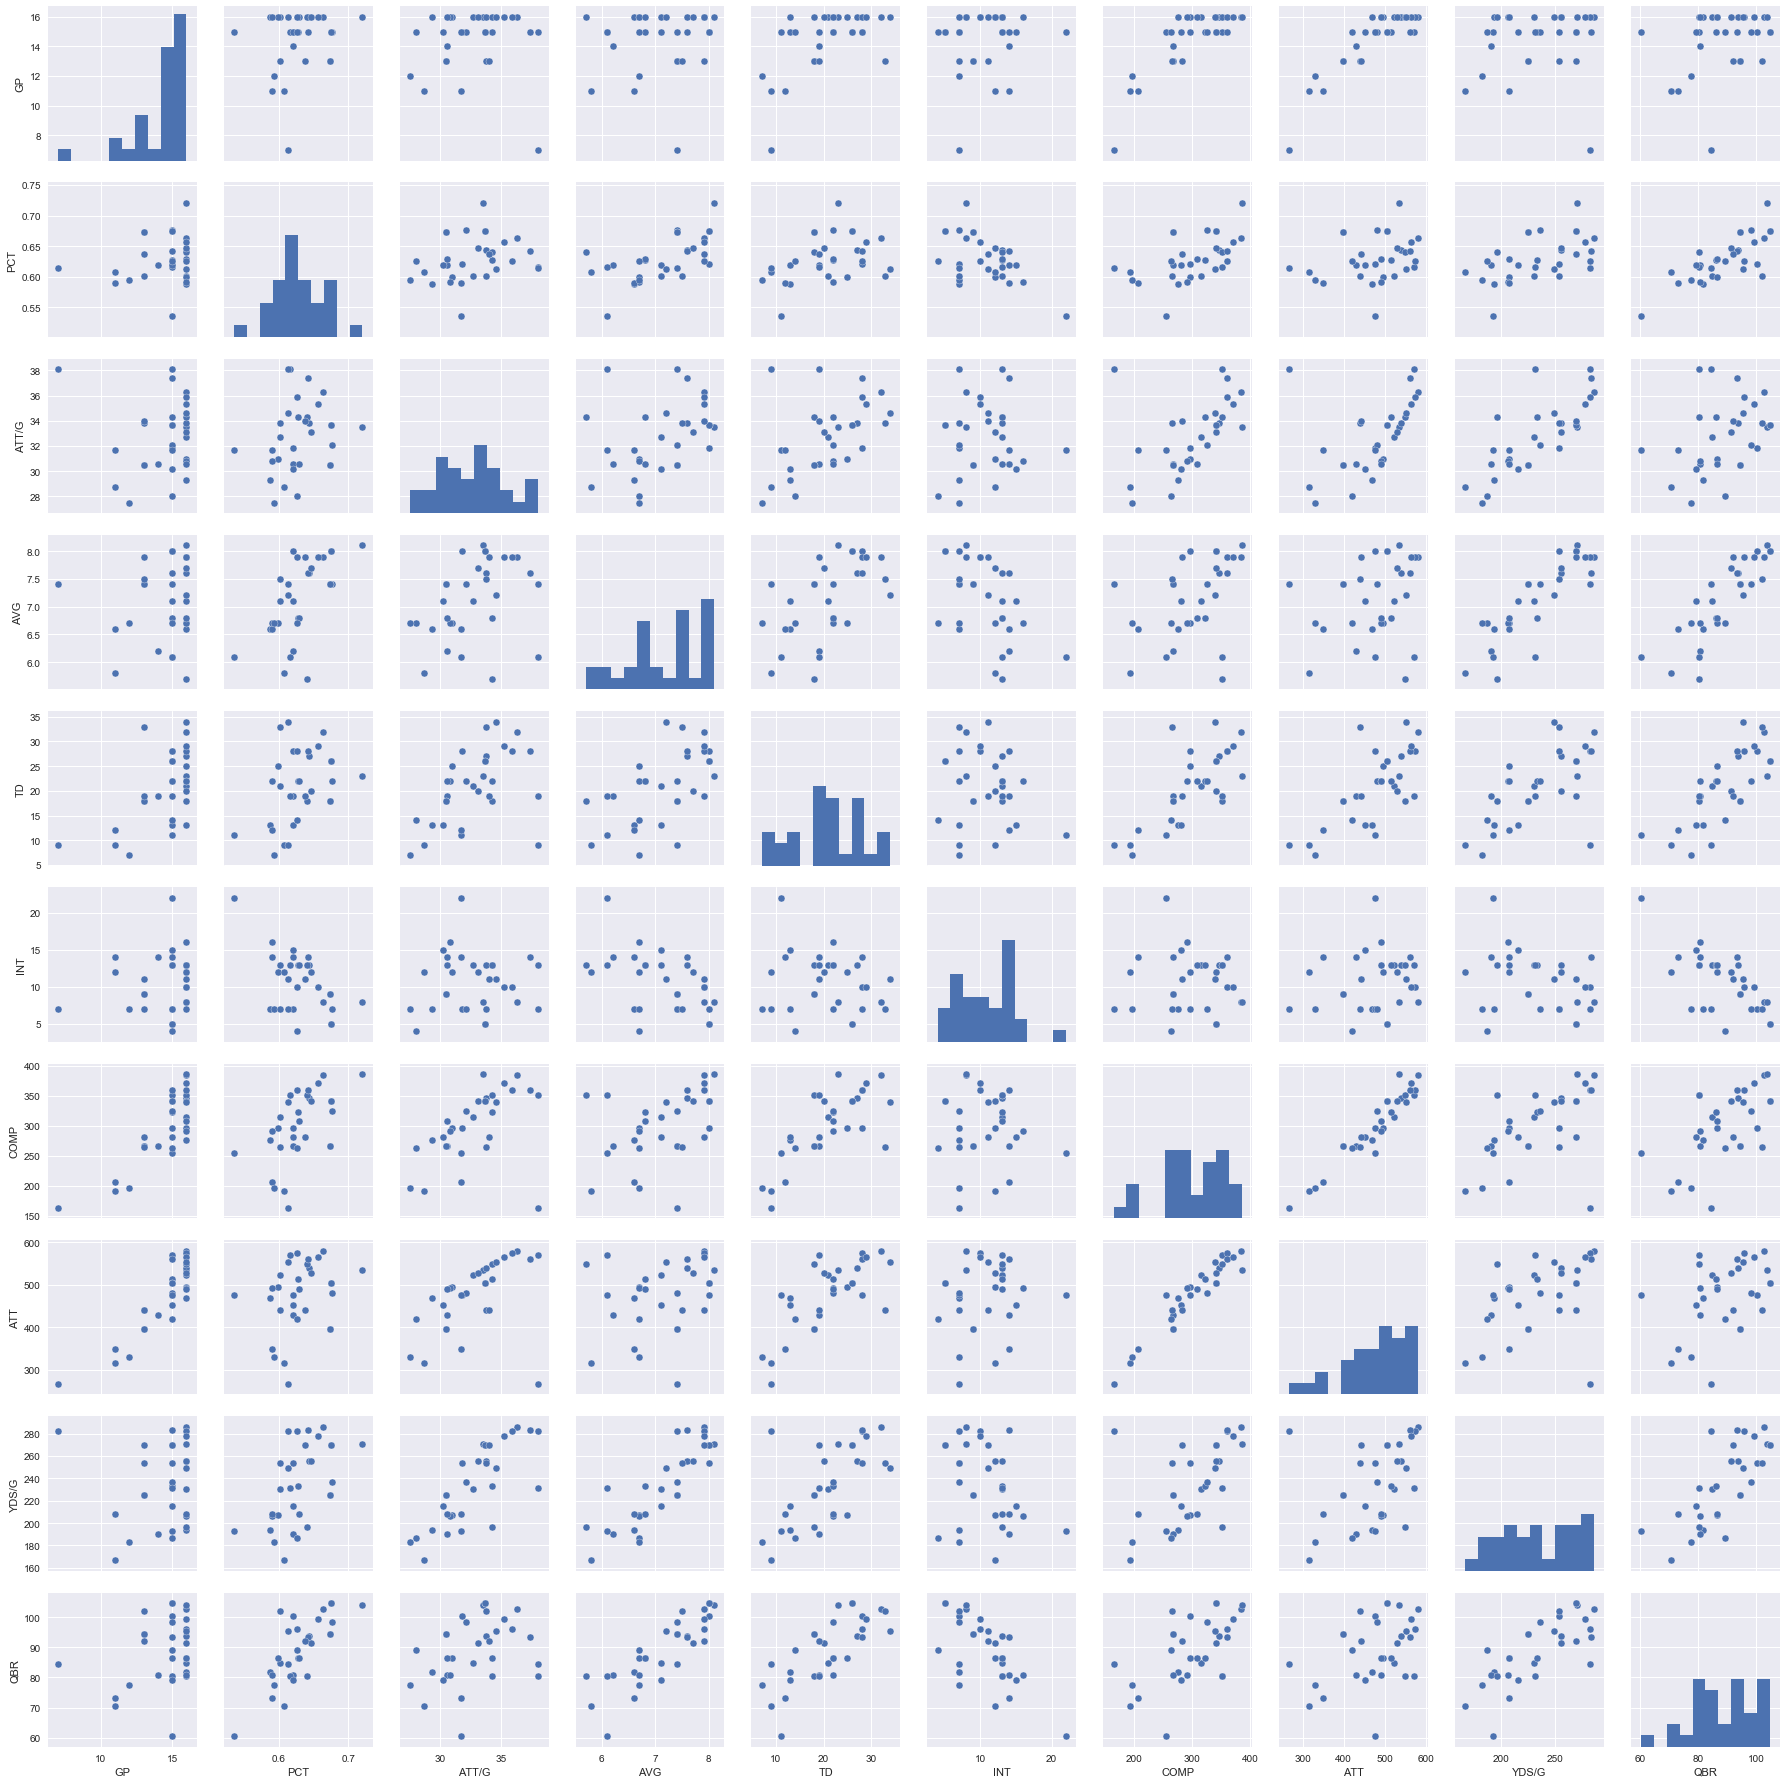

In [114]:
sns.pairplot(full_nfl[['GP','PCT','ATT/G','AVG','TD','INT','COMP','ATT','YDS/G','QBR']])